In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [14]:
# # Load the datasets
train_data = pd.read_csv('train.csv')
val_data = pd.read_csv('val.csv')
test_data = pd.read_csv('test.csv')

# # Combine train and val for preprocessing
data = pd.concat([train_data, val_data], ignore_index=True)

# Display the dataset
data.head()


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [15]:
#unique classes in dataset
data['Dominant_Emotion'].value_counts()

Dominant_Emotion
Neutral      230
Happiness    228
Anxiety      202
Sadness      185
Boredom      158
Anger        144
Agression      1
Name: count, dtype: int64

In [16]:
print("Summary statistics of the dataset:")
display(data.describe())

Summary statistics of the dataset:


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,498.358885,27.478223,95.983449,3.348432,39.831010,15.542683,22.570557
std,288.122362,3.926577,39.409799,1.938601,26.409445,8.763328,8.572339
min,1.000000,21.000000,30.000000,1.000000,5.000000,2.000000,8.000000
25%,247.750000,24.000000,65.000000,2.000000,20.000000,8.000000,17.000000
50%,495.000000,27.000000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,749.250000,30.000000,120.000000,5.000000,55.000000,22.000000,28.000000
max,1000.000000,35.000000,210.000000,10.000000,110.000000,40.000000,50.000000


In [17]:
# Check for NaN values in the dataset
nan_counts = data.isnull().sum()
print("Count of NaN values in each column:")
print(nan_counts)

Count of NaN values in each column:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


In [18]:
#Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Platform']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [19]:
data.head(10)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25.0,0,1,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30.0,1,5,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22.0,2,0,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28.0,0,1,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33.0,1,2,45.0,1.0,5.0,2.0,10.0,Boredom
5,6,21.0,1,1,150.0,4.0,60.0,15.0,25.0,Happiness
6,7,27.0,0,5,85.0,3.0,30.0,10.0,18.0,Anger
7,8,24.0,2,0,110.0,6.0,25.0,12.0,22.0,Sadness
8,9,29.0,0,2,55.0,2.0,10.0,3.0,8.0,Neutral
9,10,31.0,1,1,170.0,5.0,80.0,20.0,35.0,Happiness


In [20]:
data.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [21]:
#Normalize numeric features
scaler = MinMaxScaler()
data[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']] = scaler.fit_transform(
    data[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']])


In [22]:
# Split the data back to train and validation 80:20
train_data = data[:len(train_data)]
val_data = data[len(train_data):]

# Define features and target
X_train = train_data.drop(columns=['User_ID', 'Dominant_Emotion'])
y_train = train_data['Dominant_Emotion']
X_val = val_data.drop(columns=['User_ID', 'Dominant_Emotion'])
y_val = val_data['Dominant_Emotion']


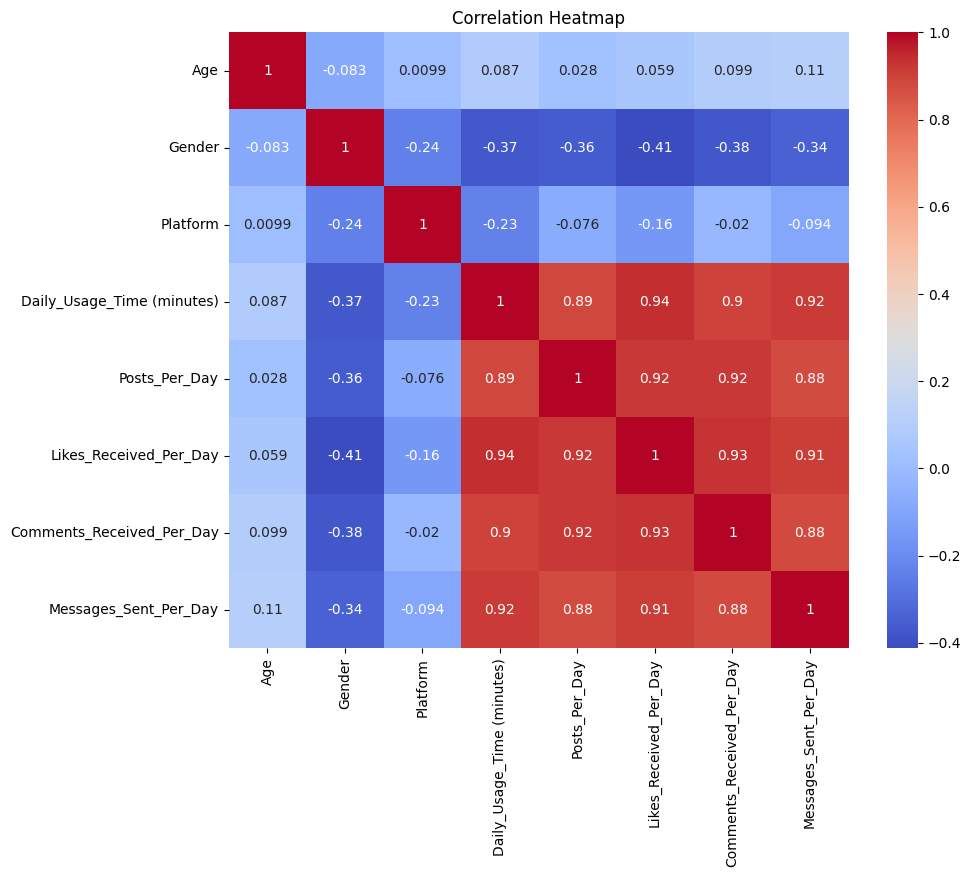

In [23]:
# Visualization Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


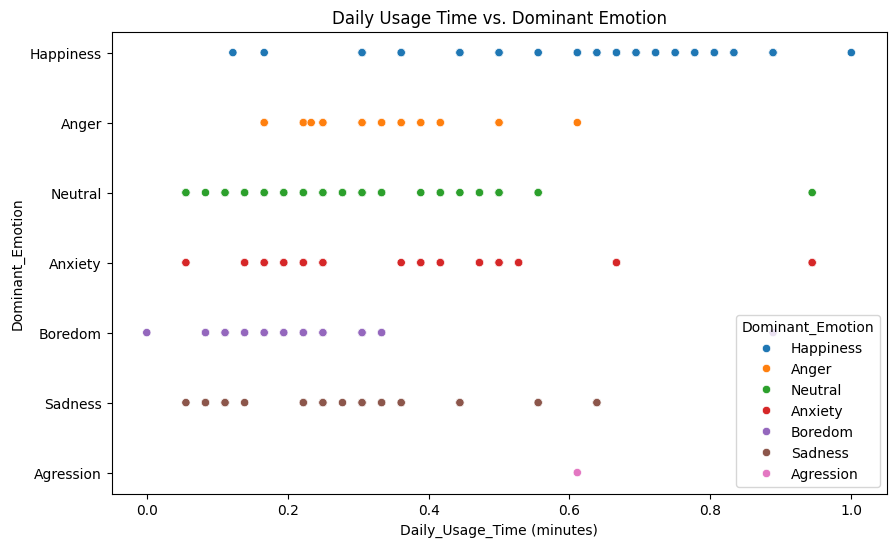

In [24]:
#Scatter plot: Daily_Usage_Time vs. Dominant_Emotion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily_Usage_Time (minutes)', y='Dominant_Emotion', data=data, hue='Dominant_Emotion')
plt.title('Daily Usage Time vs. Dominant Emotion')
plt.show()


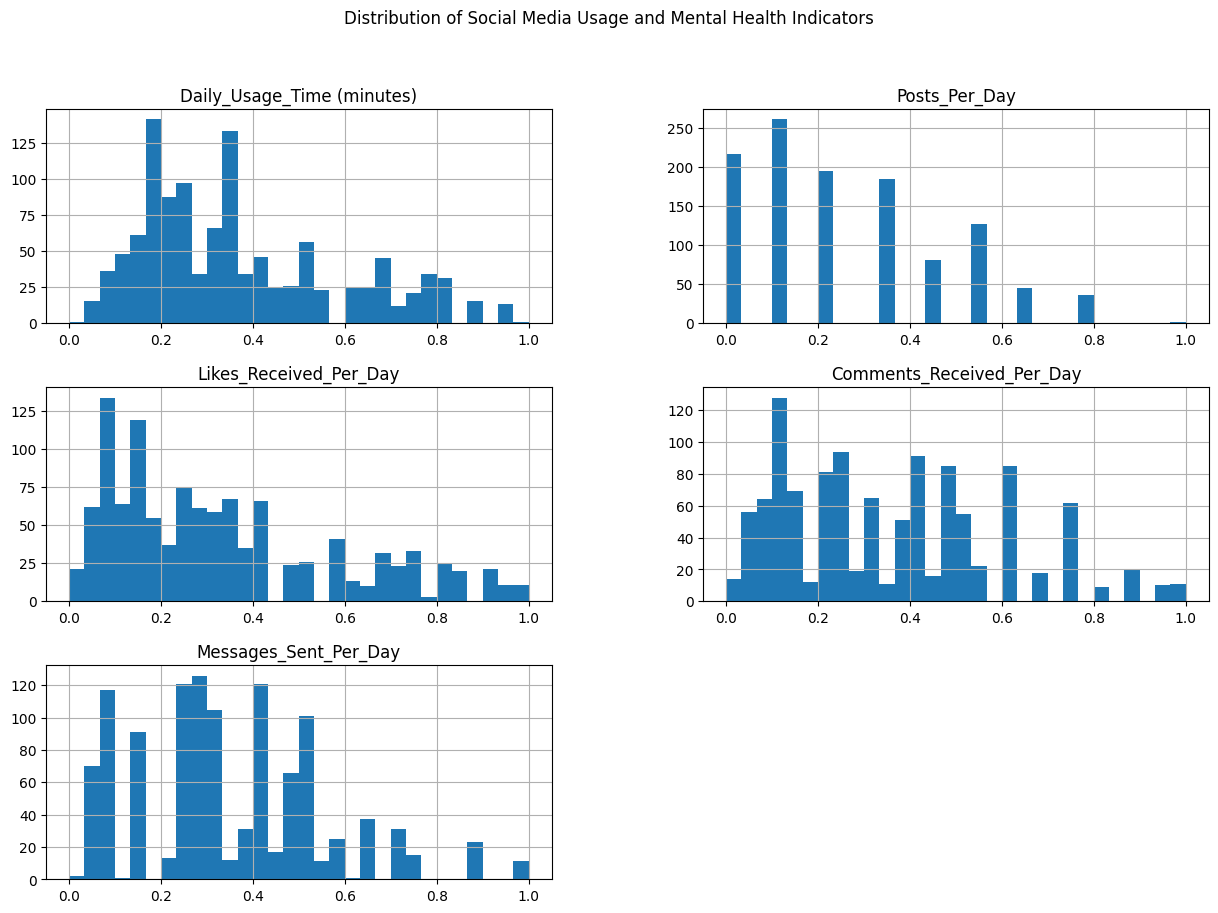

In [25]:
#Histograms
data[['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Social Media Usage and Mental Health Indicators')
plt.show()


In [26]:
# Convert Dominant_Emotion column to numeric
label_encoder_emotion = LabelEncoder()
data['Dominant_Emotion'] = label_encoder_emotion.fit_transform(data['Dominant_Emotion'])

In [27]:
# Convert y_train and y_val to numeric using the same LabelEncoder for Dominant_Emotion
y_train = label_encoder_emotion.transform(y_train)
y_val = label_encoder_emotion.transform(y_val)


In [28]:
# Identify highly correlated feature
correlation_matrix = data.corr()
print(correlation_matrix['Dominant_Emotion'].sort_values(ascending=False))


Dominant_Emotion              1.000000
Gender                        0.104218
User_ID                       0.011305
Daily_Usage_Time (minutes)   -0.018400
Posts_Per_Day                -0.020026
Likes_Received_Per_Day       -0.021918
Messages_Sent_Per_Day        -0.044280
Comments_Received_Per_Day    -0.121139
Platform                     -0.194044
Age                          -0.210173
Name: Dominant_Emotion, dtype: float64


In [29]:
y_val

array([4, 4, 6, 2, 2, 2, 2, 3, 4, 5, 6, 6, 4, 6, 1, 3, 4, 6, 1, 4, 5, 4,
       5, 2, 5, 2, 3, 1, 4, 3, 4, 3, 6, 3, 3, 2, 5, 5, 5, 4, 6, 6, 5, 6,
       1, 4, 5, 2, 4, 4, 5, 6, 6, 3, 2, 5, 6, 2, 4, 0, 1, 5, 6, 3, 1, 5,
       2, 4, 2, 6, 6, 5, 3, 4, 1, 4, 5, 3, 4, 3, 2, 2, 1, 6, 5, 5, 5, 6,
       5, 5, 3, 4, 1, 2, 4, 4, 1, 4, 2, 1, 4, 2, 2, 2, 5, 6, 1, 4, 6, 2,
       6, 2, 3, 3, 6, 2, 2, 5, 6, 3, 2, 2, 4, 1, 5, 2, 5, 2, 5, 6, 5, 1,
       2, 3, 5, 2, 5, 2, 4, 3, 4, 4, 6, 2, 6, 5, 2, 5])

In [30]:
#linear regression on dominant column
lin_reg_gender = LinearRegression()
lin_reg_gender.fit(X_train, y_train)

# Make predictions
y_pred_train = lin_reg_gender.predict(X_train)
y_pred_val = lin_reg_gender.predict(X_val)

In [31]:
accuracy_train = accuracy_score(y_train, np.round(y_pred_train))
precision_train = precision_score(y_train, np.round(y_pred_train), average='weighted')
recall_train = recall_score(y_train, np.round(y_pred_train), average='weighted')
f1_train = f1_score(y_train, np.round(y_pred_train), average='weighted')

accuracy_val = accuracy_score(y_val, np.round(y_pred_val))
precision_val = precision_score(y_val, np.round(y_pred_val), average='weighted')
recall_val = recall_score(y_val, np.round(y_pred_val), average='weighted')
f1_val = f1_score(y_val, np.round(y_pred_val), average='weighted')

print("Training set metrics:")
print(f'Accuracy: {accuracy_train:.4f}')
print(f'Precision: {precision_train:.4f}')
print(f'Recall: {recall_train:.4f}')
print(f'F1 Score: {f1_train:.4f}')

print("Validation set metrics:")
print(f'Accuracy: {accuracy_val:.4f}')
print(f'Precision: {precision_val:.4f}')
print(f'Recall: {recall_val:.4f}')
print(f'F1 Score: {f1_val:.4f}')

Training set metrics:
Accuracy: 0.2050
Precision: 0.3091
Recall: 0.2050
F1 Score: 0.1357
Validation set metrics:
Accuracy: 0.2027
Precision: 0.1401
Recall: 0.2027
F1 Score: 0.1403


In [32]:
## Multivariate regression
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)

# Make predictions
y_pred_train_multi = lin_reg_multi.predict(X_train)
y_pred_val_multi = lin_reg_multi.predict(X_val)


In [33]:
accuracy_train = accuracy_score(y_train, np.round(y_pred_train_multi))
precision_train = precision_score(y_train, np.round(y_pred_train_multi), average='weighted')
recall_train = recall_score(y_train, np.round(y_pred_train_multi), average='weighted')
f1_train = f1_score(y_train, np.round(y_pred_train_multi), average='weighted')

accuracy_val = accuracy_score(y_val, np.round(y_pred_val_multi))
precision_val = precision_score(y_val, np.round(y_pred_val_multi), average='weighted')
recall_val = recall_score(y_val, np.round(y_pred_val_multi), average='weighted')
f1_val = f1_score(y_val, np.round(y_pred_val_multi), average='weighted')

print("Training set metrics:")
print(f'Accuracy: {accuracy_train:.4f}')
print(f'Precision: {precision_train:.4f}')
print(f'Recall: {recall_train:.4f}')
print(f'F1 Score: {f1_train:.4f}')

print("Validation set metrics:")
print(f'Accuracy: {accuracy_val:.4f}')
print(f'Precision: {precision_val:.4f}')
print(f'Recall: {recall_val:.4f}')
print(f'F1 Score: {f1_val:.4f}')

Training set metrics:
Accuracy: 0.2050
Precision: 0.3091
Recall: 0.2050
F1 Score: 0.1357
Validation set metrics:
Accuracy: 0.2027
Precision: 0.1401
Recall: 0.2027
F1 Score: 0.1403


In [34]:
## Polynomial regression
degree = 3
poly = PolynomialFeatures(degree)
lin_reg_poly = make_pipeline(poly, LinearRegression())

# Fit the polynomial regression model
lin_reg_poly.fit(X_train, y_train)

# Make predictions
y_pred_train_poly = lin_reg_poly.predict(X_train)
y_pred_val_poly = lin_reg_poly.predict(X_val)

In [35]:
# Compute evaluation metrics
accuracy_train_poly = accuracy_score(y_train, np.round(y_pred_train_poly))
precision_train_poly = precision_score(y_train, np.round(y_pred_train_poly), average='weighted')
recall_train_poly = recall_score(y_train, np.round(y_pred_train_poly), average='weighted')
f1_train_poly = f1_score(y_train, np.round(y_pred_train_poly), average='weighted')

accuracy_val_poly = accuracy_score(y_val, np.round(y_pred_val_poly))
precision_val_poly = precision_score(y_val, np.round(y_pred_val_poly), average='weighted')
recall_val_poly = recall_score(y_val, np.round(y_pred_val_poly), average='weighted')
f1_val_poly = f1_score(y_val, np.round(y_pred_val_poly), average='weighted')

print("Training set metrics (Polynomial Regression):")
print(f'Accuracy: {accuracy_train_poly:.4f}')
print(f'Precision: {precision_train_poly:.4f}')
print(f'Recall: {recall_train_poly:.4f}')
print(f'F1 Score: {f1_train_poly:.4f}')

print("Validation set metrics (Polynomial Regression):")
print(f'Accuracy: {accuracy_val_poly:.4f}')
print(f'Precision: {precision_val_poly:.4f}')
print(f'Recall: {recall_val_poly:.4f}')
print(f'F1 Score: {f1_val_poly:.4f}')

Training set metrics (Polynomial Regression):
Accuracy: 0.4830
Precision: 0.5321
Recall: 0.4830
F1 Score: 0.5012
Validation set metrics (Polynomial Regression):
Accuracy: 0.2770
Precision: 0.4531
Recall: 0.2770
F1 Score: 0.3415


In [36]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_train_log = log_reg.predict(X_train)
y_pred_val_log = log_reg.predict(X_val)

In [37]:
# Compute evaluation metrics
accuracy_train_log = accuracy_score(y_train, y_pred_train_log)
precision_train_log = precision_score(y_train, y_pred_train_log, average='weighted')
recall_train_log = recall_score(y_train, y_pred_train_log, average='weighted')
f1_train_log = f1_score(y_train, y_pred_train_log, average='weighted')

accuracy_val_log = accuracy_score(y_val, y_pred_val_log)
precision_val_log = precision_score(y_val, y_pred_val_log, average='weighted')
recall_val_log = recall_score(y_val, y_pred_val_log, average='weighted')
f1_val_log = f1_score(y_val, y_pred_val_log, average='weighted')

print("Training set metrics (Logistic Regression):")
print(f'Accuracy: {accuracy_train_log:.4f}')
print(f'Precision: {precision_train_log:.4f}')
print(f'Recall: {recall_train_log:.4f}')
print(f'F1 Score: {f1_train_log:.4f}')

print("Validation set metrics (Logistic Regression):")
print(f'Accuracy: {accuracy_val_log:.4f}')
print(f'Precision: {precision_val_log:.4f}')
print(f'Recall: {recall_val_log:.4f}')
print(f'F1 Score: {f1_val_log:.4f}')

Training set metrics (Logistic Regression):
Accuracy: 0.5410
Precision: 0.5244
Recall: 0.5410
F1 Score: 0.5077
Validation set metrics (Logistic Regression):
Accuracy: 0.4932
Precision: 0.4809
Recall: 0.4932
F1 Score: 0.4753


In [38]:
# KNN with Euclidean Distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)

# Make predictions
y_pred_train_knn_euclidean = knn_euclidean.predict(X_train)
y_pred_val_knn_euclidean = knn_euclidean.predict(X_val)


In [39]:
# Compute evaluation metrics
accuracy_train_knn_euclidean = accuracy_score(y_train, y_pred_train_knn_euclidean)
precision_train_knn_euclidean = precision_score(y_train, y_pred_train_knn_euclidean, average='weighted')
recall_train_knn_euclidean = recall_score(y_train, y_pred_train_knn_euclidean, average='weighted')
f1_train_knn_euclidean = f1_score(y_train, y_pred_train_knn_euclidean, average='weighted')

accuracy_val_knn_euclidean = accuracy_score(y_val, y_pred_val_knn_euclidean)
precision_val_knn_euclidean = precision_score(y_val, y_pred_val_knn_euclidean, average='weighted')
recall_val_knn_euclidean = recall_score(y_val, y_pred_val_knn_euclidean, average='weighted')
f1_val_knn_euclidean = f1_score(y_val, y_pred_val_knn_euclidean, average='weighted')

print("Training set metrics (KNN with Euclidean Distance):")
print(f'Accuracy: {accuracy_train_knn_euclidean:.4f}')
print(f'Precision: {precision_train_knn_euclidean:.4f}')
print(f'Recall: {recall_train_knn_euclidean:.4f}')
print(f'F1 Score: {f1_train_knn_euclidean:.4f}')

print("Validation set metrics (KNN with Euclidean Distance):")
print(f'Accuracy: {accuracy_val_knn_euclidean:.4f}')
print(f'Precision: {precision_val_knn_euclidean:.4f}')
print(f'Recall: {recall_val_knn_euclidean:.4f}')
print(f'F1 Score: {f1_val_knn_euclidean:.4f}')

Training set metrics (KNN with Euclidean Distance):
Accuracy: 0.9960
Precision: 0.9960
Recall: 0.9960
F1 Score: 0.9960
Validation set metrics (KNN with Euclidean Distance):
Accuracy: 0.7838
Precision: 0.7823
Recall: 0.7838
F1 Score: 0.7804


In [40]:
#KNN with Manhattan Distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

# Make predictions
y_pred_train_knn_manhattan = knn_manhattan.predict(X_train)
y_pred_val_knn_manhattan = knn_manhattan.predict(X_val)

In [41]:
# Compute evaluation metrics
accuracy_train_knn_manhattan = accuracy_score(y_train, y_pred_train_knn_manhattan)
precision_train_knn_manhattan = precision_score(y_train, y_pred_train_knn_manhattan, average='weighted')
recall_train_knn_manhattan = recall_score(y_train, y_pred_train_knn_manhattan, average='weighted')
f1_train_knn_manhattan = f1_score(y_train, y_pred_train_knn_manhattan, average='weighted')

accuracy_val_knn_manhattan = accuracy_score(y_val, y_pred_val_knn_manhattan)
precision_val_knn_manhattan = precision_score(y_val, y_pred_val_knn_manhattan, average='weighted')
recall_val_knn_manhattan = recall_score(y_val, y_pred_val_knn_manhattan, average='weighted')
f1_val_knn_manhattan = f1_score(y_val, y_pred_val_knn_manhattan, average='weighted')

print("Training set metrics (KNN with Manhattan Distance):")
print(f'Accuracy: {accuracy_train_knn_manhattan:.4f}')
print(f'Precision: {precision_train_knn_manhattan:.4f}')
print(f'Recall: {recall_train_knn_manhattan:.4f}')
print(f'F1 Score: {f1_train_knn_manhattan:.4f}')

print("Validation set metrics (KNN with Manhattan Distance):")
print(f'Accuracy: {accuracy_val_knn_manhattan:.4f}')
print(f'Precision: {precision_val_knn_manhattan:.4f}')
print(f'Recall: {recall_val_knn_manhattan:.4f}')
print(f'F1 Score: {f1_val_knn_manhattan:.4f}')

Training set metrics (KNN with Manhattan Distance):
Accuracy: 0.9980
Precision: 0.9980
Recall: 0.9980
F1 Score: 0.9980
Validation set metrics (KNN with Manhattan Distance):
Accuracy: 0.7838
Precision: 0.7833
Recall: 0.7838
F1 Score: 0.7814


In [42]:
# KNN with Cosine Distance
knn_cosine = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn_cosine.fit(X_train, y_train)

# Make predictions
y_pred_train_knn_cosine = knn_cosine.predict(X_train)
y_pred_val_knn_cosine = knn_cosine.predict(X_val)

In [43]:
# Compute evaluation metrics
accuracy_train_knn_cosine = accuracy_score(y_train, y_pred_train_knn_cosine)
precision_train_knn_cosine = precision_score(y_train, y_pred_train_knn_cosine, average='weighted')
recall_train_knn_cosine = recall_score(y_train, y_pred_train_knn_cosine, average='weighted')
f1_train_knn_cosine = f1_score(y_train, y_pred_train_knn_cosine, average='weighted')

accuracy_val_knn_cosine = accuracy_score(y_val, y_pred_val_knn_cosine)
precision_val_knn_cosine = precision_score(y_val, y_pred_val_knn_cosine, average='weighted')
recall_val_knn_cosine = recall_score(y_val, y_pred_val_knn_cosine, average='weighted')
f1_val_knn_cosine = f1_score(y_val, y_pred_val_knn_cosine, average='weighted')

print("Training set metrics (KNN with Cosine Distance):")
print(f'Accuracy: {accuracy_train_knn_cosine:.4f}')
print(f'Precision: {precision_train_knn_cosine:.4f}')
print(f'Recall: {recall_train_knn_cosine:.4f}')
print(f'F1 Score: {f1_train_knn_cosine:.4f}')

print("Validation set metrics (KNN with Cosine Distance):")
print(f'Accuracy: {accuracy_val_knn_cosine:.4f}')
print(f'Precision: {precision_val_knn_cosine:.4f}')
print(f'Recall: {recall_val_knn_cosine:.4f}')
print(f'F1 Score: {f1_val_knn_cosine:.4f}')

Training set metrics (KNN with Cosine Distance):
Accuracy: 0.9980
Precision: 0.9980
Recall: 0.9980
F1 Score: 0.9980
Validation set metrics (KNN with Cosine Distance):
Accuracy: 0.7432
Precision: 0.7485
Recall: 0.7432
F1 Score: 0.7394


In [44]:
# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred_train_dt = dt.predict(X_train)
y_pred_val_dt = dt.predict(X_val)

In [45]:
# Compute evaluation metrics
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
precision_train_dt = precision_score(y_train, y_pred_train_dt, average='weighted')
recall_train_dt = recall_score(y_train, y_pred_train_dt, average='weighted')
f1_train_dt = f1_score(y_train, y_pred_train_dt, average='weighted')

accuracy_val_dt = accuracy_score(y_val, y_pred_val_dt)
precision_val_dt = precision_score(y_val, y_pred_val_dt, average='weighted')
recall_val_dt = recall_score(y_val, y_pred_val_dt, average='weighted')
f1_val_dt = f1_score(y_val, y_pred_val_dt, average='weighted')

print("Training set metrics (Decision Trees):")
print(f'Accuracy: {accuracy_train_dt:.4f}')
print(f'Precision: {precision_train_dt:.4f}')
print(f'Recall: {recall_train_dt:.4f}')
print(f'F1 Score: {f1_train_dt:.4f}')

print("Validation set metrics (Decision Trees):")
print(f'Accuracy: {accuracy_val_dt:.4f}')
print(f'Precision: {precision_val_dt:.4f}')
print(f'Recall: {recall_val_dt:.4f}')
print(f'F1 Score: {f1_val_dt:.4f}')

Training set metrics (Decision Trees):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Validation set metrics (Decision Trees):
Accuracy: 0.7905
Precision: 0.7884
Recall: 0.7905
F1 Score: 0.7885


In [46]:
# Additional evaluation: ROC curve for the best model (assuming Random Forest for demonstration)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = rf.predict(X_train)
y_pred_val_rf = rf.predict(X_val)


In [47]:
# Compute evaluation metrics
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
precision_train_rf = precision_score(y_train, y_pred_train_rf, average='weighted')
recall_train_rf = recall_score(y_train, y_pred_train_rf, average='weighted')
f1_train_rf = f1_score(y_train, y_pred_train_rf, average='weighted')

accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
precision_val_rf = precision_score(y_val, y_pred_val_rf, average='weighted')
recall_val_rf = recall_score(y_val, y_pred_val_rf, average='weighted')
f1_val_rf = f1_score(y_val, y_pred_val_rf, average='weighted')

print("Training set metrics (Random Forest):")
print(f'Accuracy: {accuracy_train_rf:.4f}')
print(f'Precision: {precision_train_rf:.4f}')
print(f'Recall: {recall_train_rf:.4f}')
print(f'F1 Score: {f1_train_rf:.4f}')

print("Validation set metrics (Random Forest):")
print(f'Accuracy: {accuracy_val_rf:.4f}')
print(f'Precision: {precision_val_rf:.4f}')
print(f'Recall: {recall_val_rf:.4f}')
print(f'F1 Score: {f1_val_rf:.4f}')

Training set metrics (Random Forest):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Validation set metrics (Random Forest):
Accuracy: 0.8176
Precision: 0.8152
Recall: 0.8176
F1 Score: 0.8150


In [48]:
#now preprocess test data to make predicitons
test_data

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...,...
98,184,22,Male,Twitter,70,1,20,5,22,Neutral
99,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
100,708,24,Non-binary,Facebook,110,6,35,23,25,Sadness
101,993,24,Male,Telegram,75,3,37,16,22,Neutral


In [49]:
#Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Platform']:
    label_encoders[column] = LabelEncoder()
    test_data[column] = label_encoders[column].fit_transform(test_data[column])


In [50]:
#Normalize numeric features
scaler = MinMaxScaler()
test_data[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']] = scaler.fit_transform(
    test_data[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']])


In [51]:
X_test1 = test_data.drop(columns=['User_ID', 'Dominant_Emotion'])
y_test1 = test_data['Dominant_Emotion']

In [52]:
y_pred_test_linear_reg_gender = lin_reg_gender.predict(X_test1)
y_pred_test_multi = lin_reg_multi.predict(X_test1)
y_pred_test_poly = lin_reg_poly.predict(X_test1)
y_pred_test_log = log_reg.predict(X_test1)
y_pred_test_knn_euclidean = knn_euclidean.predict(X_test1)
y_pred_test_knn_manhattan = knn_manhattan.predict(X_test1)
y_pred_test_knn_cosine = knn_cosine.predict(X_test1)
y_pred_test_dt = dt.predict(X_test1)
y_pred_test_rf = rf.predict(X_test1)


In [53]:
label_encoder = LabelEncoder()
y_test1 = label_encoder.fit_transform(y_test1)

In [54]:
# Initialize lists
algo_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Linear Regression (Gender)
algo_names.append("Linear Regression (Gender)")
accuracy_scores.append(accuracy_score(y_test1, np.round(y_pred_test_linear_reg_gender)))
precision_scores.append(precision_score(y_test1, np.round(y_pred_test_linear_reg_gender), average='weighted'))
recall_scores.append(recall_score(y_test1, np.round(y_pred_test_linear_reg_gender), average='weighted'))
f1_scores.append(f1_score(y_test1, np.round(y_pred_test_linear_reg_gender), average='weighted'))

# Multivariate Linear Regression
algo_names.append("Multivariate Linear Regression")
accuracy_scores.append(accuracy_score(y_test1, np.round(y_pred_test_multi)))
precision_scores.append(precision_score(y_test1, np.round(y_pred_test_multi), average='weighted'))
recall_scores.append(recall_score(y_test1, np.round(y_pred_test_multi), average='weighted'))
f1_scores.append(f1_score(y_test1, np.round(y_pred_test_multi), average='weighted'))

# Polynomial Regression
algo_names.append("Polynomial Regression")
accuracy_scores.append(accuracy_score(y_test1, np.round(y_pred_test_poly)))
precision_scores.append(precision_score(y_test1, np.round(y_pred_test_poly), average='weighted'))
recall_scores.append(recall_score(y_test1, np.round(y_pred_test_poly), average='weighted'))
f1_scores.append(f1_score(y_test1, np.round(y_pred_test_poly), average='weighted'))

# Logistic Regression
algo_names.append("Logistic Regression")
accuracy_scores.append(accuracy_score(y_test1, np.round(y_pred_test_log)))
precision_scores.append(precision_score(y_test1, np.round(y_pred_test_log), average='weighted'))
recall_scores.append(recall_score(y_test1, np.round(y_pred_test_log), average='weighted'))
f1_scores.append(f1_score(y_test1, np.round(y_pred_test_log), average='weighted'))

# KNN (Euclidean Distance)
algo_names.append("KNN (Euclidean Distance)")
accuracy_scores.append(accuracy_score(y_test1, y_pred_test_knn_euclidean))
precision_scores.append(precision_score(y_test1, y_pred_test_knn_euclidean, average='weighted'))
recall_scores.append(recall_score(y_test1, y_pred_test_knn_euclidean, average='weighted'))
f1_scores.append(f1_score(y_test1, y_pred_test_knn_euclidean, average='weighted'))

# KNN (Manhattan Distance)
algo_names.append("KNN (Manhattan Distance)")
accuracy_scores.append(accuracy_score(y_test1, y_pred_test_knn_manhattan))
precision_scores.append(precision_score(y_test1, y_pred_test_knn_manhattan, average='weighted'))
recall_scores.append(recall_score(y_test1, y_pred_test_knn_manhattan, average='weighted'))
f1_scores.append(f1_score(y_test1, y_pred_test_knn_manhattan, average='weighted'))

# KNN (Cosine Distance)
algo_names.append("KNN (Cosine Distance)")
accuracy_scores.append(accuracy_score(y_test1, y_pred_test_knn_cosine))
precision_scores.append(precision_score(y_test1, y_pred_test_knn_cosine, average='weighted'))
recall_scores.append(recall_score(y_test1, y_pred_test_knn_cosine, average='weighted'))
f1_scores.append(f1_score(y_test1, y_pred_test_knn_cosine, average='weighted'))

# Decision Trees
algo_names.append("Decision Trees")
accuracy_scores.append(accuracy_score(y_test1, y_pred_test_dt))
precision_scores.append(precision_score(y_test1, y_pred_test_dt, average='weighted'))
recall_scores.append(recall_score(y_test1, y_pred_test_dt, average='weighted'))
f1_scores.append(f1_score(y_test1, y_pred_test_dt, average='weighted'))

# Random Forest
algo_names.append("Random Forest")
accuracy_scores.append(accuracy_score(y_test1, y_pred_test_rf))
precision_scores.append(precision_score(y_test1, y_pred_test_rf, average='weighted'))
recall_scores.append(recall_score(y_test1, y_pred_test_rf, average='weighted'))
f1_scores.append(f1_score(y_test1, y_pred_test_rf, average='weighted'))


In [55]:
#printung results of all algorithms on test data
df = pd.DataFrame({
    'Algorithm': algo_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})
df

,Algorithm,Accuracy,Precision,Recall,F1-score
0,Linear Regression (Gender),0.281553,0.133495,0.281553,0.180511
1,Multivariate Linear Regression,0.281553,0.133495,0.281553,0.180511
2,Polynomial Regression,0.058252,0.378641,0.058252,0.093204
3,Logistic Regression,0.116505,0.134404,0.116505,0.117476
4,KNN (Euclidean Distance),0.009709,0.021359,0.009709,0.013350
5,KNN (Manhattan Distance),0.009709,0.021359,0.009709,0.013350
6,KNN (Cosine Distance),0.009709,0.021359,0.009709,0.013350
7,Decision Trees,0.009709,0.017799,0.009709,0.012564
8,Random Forest,0.009709,0.004531,0.009709,0.006178


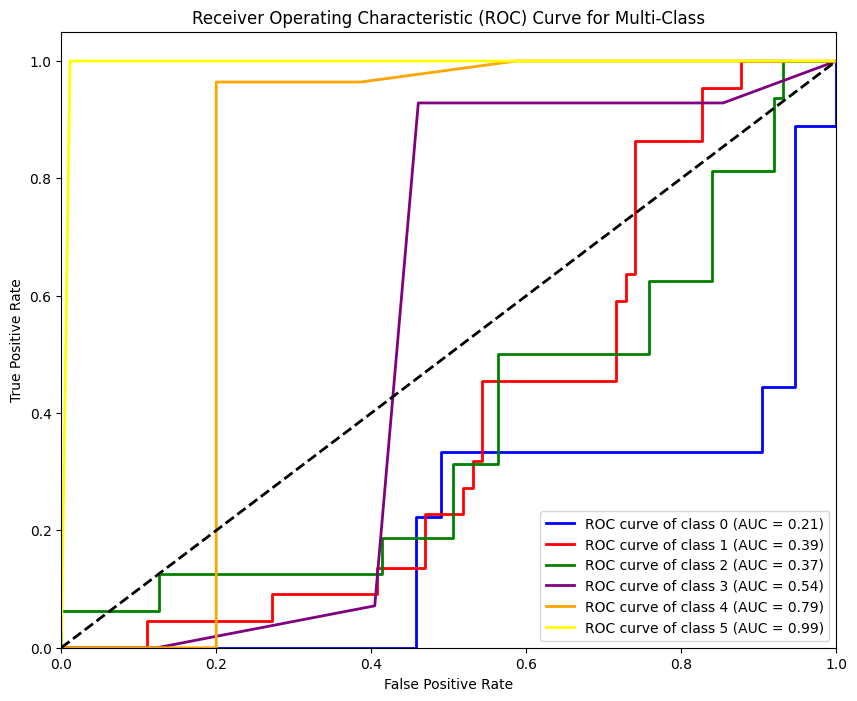

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


y_scores_linear_reg_gender = y_pred_test_linear_reg_gender
y_scores_multi = y_pred_test_multi
y_scores_poly = y_pred_test_poly
y_scores_log = y_pred_test_log
y_scores_knn_euclidean = y_pred_test_knn_euclidean
y_scores_knn_manhattan = y_pred_test_knn_manhattan
y_scores_knn_cosine = y_pred_test_knn_cosine
y_scores_dt = y_pred_test_dt
y_scores_rf = y_pred_test_rf

# Combine predicted probabilities into a list
y_scores = [
    y_scores_linear_reg_gender,
    y_scores_multi,
    y_scores_poly,
    y_scores_log,
    y_scores_knn_euclidean,
    y_scores_knn_manhattan,
    y_scores_knn_cosine,
    y_scores_dt,
    y_scores_rf
]

y_test = y_test1
# Binarize the out as we have multiclass data
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))


n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()


In [58]:
import pandas as pd

def get_user_data():
    print("Please enter the following information:")

    age = int(input("Age: "))

    gender = input("Gender (Male/Female/Other): ").strip().lower()  # Assuming standard input format

    platform = input("Platform (e.g., Facebook, Instagram): ").strip()

    daily_usage_time = float(input("Daily Usage Time (minutes): "))

    posts_per_day = float(input("Posts Per Day: "))

    likes_received_per_day = float(input("Likes Received Per Day: "))

    comments_received_per_day = float(input("Comments Received Per Day: "))

    messages_sent_per_day = float(input("Messages Sent Per Day: "))

    dominant_emotion = input("Dominant Emotion (Neutral/Happiness/Anxiety/Sadness/Boredom/Anger/Agression): ").strip().lower()

    # Return collected data as a dictionary
    user_data = {
        'Age': age,
        'Gender': gender,
        'Platform': platform,
        'Daily_Usage_Time (minutes)': daily_usage_time,
        'Posts_Per_Day': posts_per_day,
        'Likes_Received_Per_Day': likes_received_per_day,
        'Comments_Received_Per_Day': comments_received_per_day,
        'Messages_Sent_Per_Day': messages_sent_per_day,
        'Dominant_Emotion': dominant_emotion
    }

    return user_data

if __name__ == "__main__":
    user_data = get_user_data()


    user_df = pd.DataFrame([user_data])


Please enter the following information:


In [59]:
user_df

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,25,male,Instagram,30.0,1.0,20.0,4.0,40.0,boredom


In [60]:
#Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Platform']:
    label_encoders[column] = LabelEncoder()
    user_df[column] = label_encoders[column].fit_transform(user_df[column])

In [61]:
#Normalize numeric features
scaler = MinMaxScaler()
test_data[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']] = scaler.fit_transform(
    test_data[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']])


In [62]:
user_df_X = user_df.drop(columns=['Dominant_Emotion'])
user_df_Y = user_df['Dominant_Emotion']

In [63]:
y_pred_test_linear_reg_gender = lin_reg_gender.predict(user_df_X).astype(int)
y_pred_test_multi = lin_reg_multi.predict(user_df_X).astype(int)
y_pred_test_poly = lin_reg_poly.predict(user_df_X).astype(int)
y_pred_test_log = log_reg.predict(user_df_X).astype(int)
y_pred_test_knn_euclidean = knn_euclidean.predict(user_df_X).astype(int)
y_pred_test_knn_manhattan = knn_manhattan.predict(user_df_X).astype(int)
y_pred_test_knn_cosine = knn_cosine.predict(user_df_X).astype(int)
y_pred_test_dt = dt.predict(user_df_X).astype(int)
y_pred_test_rf = rf.predict(user_df_X).astype(int)


In [64]:
emotion_mapping_reverse = {
    0: 'Neutral',
    1: 'Happiness',
    2: 'Anxiety',
    3: 'Sadness',
    4: 'Boredom',
    5: 'Anger',
    6: 'Aggression'
}


In [69]:
# y_pred_linear_reg_gender_emotions = [emotion_mapping_reverse[label] for label in y_pred_test_linear_reg_gender]
# y_pred_multi_emotions = [emotion_mapping_reverse[label] for label in y_pred_test_multi]
# y_pred_poly_emotions = [emotion_mapping_reverse[label] for label in y_pred_test_poly]
y_pred_log_emotions = [emotion_mapping_reverse[label] for label in y_pred_test_log]
y_pred_knn_euclidean_emotions = [emotion_mapping_reverse[label] for label in y_pred_test_knn_euclidean]
y_pred_knn_manhattan_emotions = [emotion_mapping_reverse[label] for label in y_pred_test_knn_manhattan]
y_pred_knn_cosine_emotions = [emotion_mapping_reverse[label] for label in y_pred_test_knn_cosine]
y_pred_dt_emotions = [emotion_mapping_reverse[label] for label in y_pred_test_dt]
y_pred_rf_emotions = [emotion_mapping_reverse[label] for label in y_pred_test_rf]

# # Print all predicted emotions
# print("Predicted Emotions (Linear Regression - Gender):", y_pred_linear_reg_gender_emotions)
# print("Predicted Emotions (Multivariate Linear Regression):", y_pred_multi_emotions)
# print("Predicted Emotions (Polynomial Regression):", y_pred_poly_emotions)
print("Predicted Emotions (Logistic Regression):", y_pred_log_emotions)
print("Predicted Emotions (KNN - Euclidean Distance):", y_pred_knn_euclidean_emotions)
print("Predicted Emotions (KNN - Manhattan Distance):", y_pred_knn_manhattan_emotions)
print("Predicted Emotions (KNN - Cosine Distance):", y_pred_knn_cosine_emotions)
print("Predicted Emotions (Decision Trees):", y_pred_dt_emotions)
print("Predicted Emotions (Random Forest):", y_pred_rf_emotions)

Predicted Emotions (Logistic Regression): ['Boredom']
Predicted Emotions (KNN - Euclidean Distance): ['Boredom']
Predicted Emotions (KNN - Manhattan Distance): ['Anxiety']
Predicted Emotions (KNN - Cosine Distance): ['Anger']
Predicted Emotions (Decision Trees): ['Anxiety']
Predicted Emotions (Random Forest): ['Anxiety']
